In [1]:
import twosigmafunc
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data 

In [2]:
train, feature_cols = twosigmafunc.preprocess()

ids = train. 

In [5]:
ids = train.id.unique()

In [6]:
ids

array([  10,   11,   12, ..., 2076,  435, 1229])

# Exploring ID 10 

In [42]:
def plot_time_series(id, features):
    import seaborn as sb 
    time = train.loc[train.id==id, 'timestamp']
    variables = train.loc[train.id==id, features]
    if not isinstance(features, list):
        plt.plot(time, variables)
        plt.xlabel('timestamp')
        plt.ylabel(features)
    else:
        for variable in variables.columns:
            plt.plot(time, variables[variable])
            plt.xlabel('timestamp')
            plt.ylabel(variable)
            plt.title('ID='+str(id))
            plt.show()

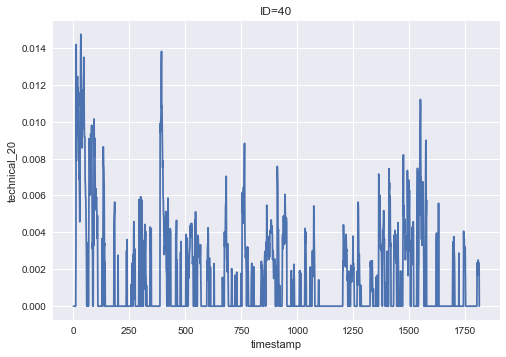

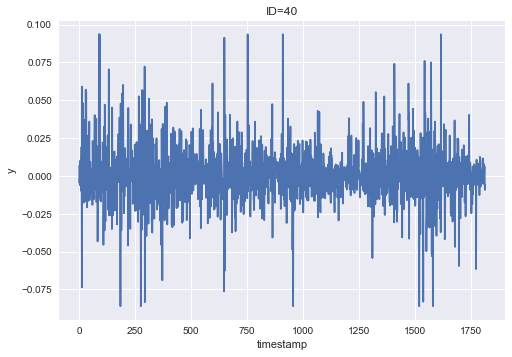

In [43]:
plot_time_series(40, ['technical_20', 'y'])

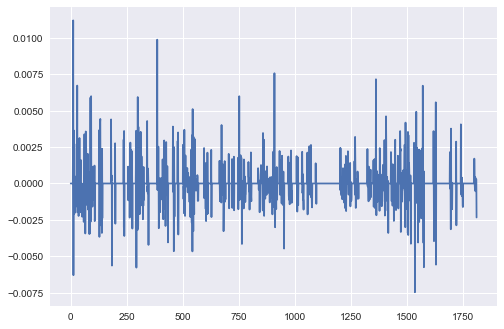

In [51]:
plt.plot(train.loc[train.id==40, 'timestamp'],train.loc[train.id==40, 'technical_20'].diff())

# Find `diff` more important than feature itself 

In [83]:
tec20_id40 = train.loc[train.id==10, ['timestamp'a, 'technical_20', 'y']]
tec20_id40['diff'] = tec20_id40.technical_20.diff()
tec20_id40.dropna(how='any', inplace=True)                               

In [84]:
import numpy as np
np.corrcoef(tec20_id40.technical_20, tec20_id40.y)[0][1]

0.011253581301607352

In [85]:
np.corrcoef(tec20_id40['diff'], tec20_id40.y)[0][1]

-0.1668820731463346

In [129]:
def correlation_improve(ids, features):
    from collections import defaultdict
    improve = defaultdict(float)
    for index, feature in enumerate(features):
        print(index, 'feature:', feature)
        improve[feature] = 0.0
        num = 0
        for id in ids:
            clean_cols = train.loc[train.id==id, [feature, 'y']]
            clean_cols['difference'] = clean_cols[feature].diff()
            clean_cols.dropna(how='any', inplace=True)
            corr_diff = np.corrcoef(clean_cols['difference'], clean_cols.y)[0][1]
            corr_feature = np.corrcoef(clean_cols[feature], clean_cols.y)[0][1]
            if np.abs(corr_feature) > 1e-6:
                improve[feature] += (np.abs(corr_diff) - np.abs(corr_feature)) / np.abs(corr_feature)
                num += 1
        improve[feature] /= num
        print('valid ids:', num)
    return improve

In [130]:
improve = correlation_improve(list(ids), feature_cols)

0 feature: derived_0


/usr/local/lib/python3.4/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.4/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.4/site-packages/numpy/lib/function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.4/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.4/site-packages/numpy/lib/function_base.py:2929: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.4/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.4/site-packages/numpy/lib/function_base.py:3004: Runti

valid ids: 1319
1 feature: derived_1
valid ids: 1313
2 feature: derived_2
valid ids: 1066
3 feature: derived_3
valid ids: 1257
4 feature: derived_4
valid ids: 1052
5 feature: fundamental_0
valid ids: 1381
6 feature: fundamental_1
valid ids: 817
7 feature: fundamental_2
valid ids: 1102
8 feature: fundamental_3
valid ids: 1027
9 feature: fundamental_5
valid ids: 590
10 feature: fundamental_6
valid ids: 765
11 feature: fundamental_7
valid ids: 1383
12 feature: fundamental_8
valid ids: 1090
13 feature: fundamental_9
valid ids: 1004
14 feature: fundamental_10
valid ids: 1299
15 feature: fundamental_11
valid ids: 1102
16 feature: fundamental_12
valid ids: 1313
17 feature: fundamental_13
valid ids: 1104
18 feature: fundamental_14
valid ids: 1103
19 feature: fundamental_15
valid ids: 1112
20 feature: fundamental_16
valid ids: 1103
21 feature: fundamental_17
valid ids: 1292
22 feature: fundamental_18
valid ids: 1388
23 feature: fundamental_19
valid ids: 1244
24 feature: fundamental_20
valid ids

In [131]:
improve

defaultdict(float,
            {'derived_0': 6.67907031850243,
             'derived_1': 2.7046425144222743,
             'derived_2': 3.346226430795721,
             'derived_3': 2.4786467603340108,
             'derived_4': 6.3265763627204397,
             'fundamental_0': 3.3881555227693441,
             'fundamental_1': 3.3066870339281795,
             'fundamental_10': 11.02327155579149,
             'fundamental_11': 7.362433683540436,
             'fundamental_12': 2.7525068474959844,
             'fundamental_13': 5.3828177508677584,
             'fundamental_14': 4.5302056708156595,
             'fundamental_15': 4.1798551229904373,
             'fundamental_16': 7.3711444963002659,
             'fundamental_17': 4.5038429551106844,
             'fundamental_18': 4.6807861192002065,
             'fundamental_19': 3.9588496399283235,
             'fundamental_2': 5.0991737705224374,
             'fundamental_20': 1.6722605216963931,
             'fundamental_21': 2.823699841340

In [135]:
np.array([x[1] for x in improve.items()]).mean()

6.3892418746807209

In [136]:
data_sm = train[['id', 'y', 'timestamp']]

In [139]:
data_sort_sm = data_sm.sort_values('id')

In [141]:
data_sort_sm.loc[data_sort_sm.id.diff()!=0, 'y']=np.nan

In [147]:
data_sort_sm.sort_index(inplace=True)

# Test on `technical_20` 

In [150]:
tec20_data = train[['id', 'timestamp', 'y', 'technical_20']]

In [154]:
tec20_data_id = tec20_data.sort_values(['id', 'timestamp'])

In [156]:
tec20_data_id.head()

,id,timestamp,y,technical_20
131062,0,167,-0.007108,NaN
131895,0,168,0.001950,NaN
132728,0,169,0.017724,NaN
133561,0,170,0.012934,NaN
134393,0,171,-0.025229,NaN


In [158]:
tec20_data_id['difference'] = tec20_data_id.technical_20.diff()

In [160]:
tec20_data_id['id_diff'] = tec20_data_id.id.diff()

In [162]:
tec20_data_id.loc[tec20_data_id.id_diff!=0, 'difference']=0

In [166]:
tec20_data_id.dropna(how='any', inplace=True)

In [168]:
np.corrcoef(tec20_data_id.y, tec20_data_id.technical_20)[0][1]

-0.016574487934195133

In [170]:
np.corrcoef(tec20_data_id.difference, tec20_data_id.y)[0][1]

-0.021368730986969998

In [172]:
tec20_data_id.head()

,id,timestamp,y,technical_20,difference,id_diff
138545,0,176,-0.011354,0.0,0.0,0.0
139374,0,177,0.011996,0.0,0.0,0.0
140203,0,178,0.010069,0.0,0.0,0.0
141032,0,179,0.010060,0.0,0.0,0.0
141861,0,180,0.027913,0.0,0.0,0.0


In [173]:
tec20_data_id.sort_index().head()

,id,timestamp,y,technical_20,difference,id_diff
0,10,0,-0.011753,0.000000,0.0,3.0
1,11,0,-0.001240,0.000000,0.0,1.0
2,12,0,-0.020940,0.006942,0.0,1.0
3,25,0,-0.015959,0.006766,0.0,1.0
4,26,0,-0.007338,0.006236,0.0,1.0


In [174]:
sm_data = tec20_data[0:20]

In [175]:
sm_data

,id,timestamp,y,technical_20,difference
0,10,0,-0.011753,0.000000,NaN
1,11,0,-0.001240,0.000000,0.000000
2,12,0,-0.020940,0.006942,0.006942
3,25,0,-0.015959,0.006766,-0.000176
4,26,0,-0.007338,0.006236,-0.000530
5,27,0,0.031425,0.010000,0.003764
6,31,0,-0.032895,0.006601,-0.003398
7,38,0,0.015803,0.007909,0.001307
8,39,0,-0.027593,0.000000,-0.007909
9,40,0,0.006662,0.000000,0.000000


In [178]:
sm_data.loc[sm_data.id < 30, 'y']=10

/usr/local/lib/python3.4/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [179]:
sm_data

,id,timestamp,y,technical_20,difference
0,0,0,10.000000,0.000000,0.000000
1,0,0,10.000000,0.000000,0.000000
2,0,0,10.000000,0.000000,0.000000
3,0,0,10.000000,0.000000,0.000000
4,0,0,10.000000,0.000000,0.000000
5,0,0,10.000000,0.000000,0.000000
6,31,0,-0.032895,0.006601,-0.003398
7,38,0,0.015803,0.007909,0.001307
8,39,0,-0.027593,0.000000,-0.007909
9,40,0,0.006662,0.000000,0.000000


# generate all `diff` 

In [3]:
train.sort_values(['id', 'timestamp'], inplace=True)
diff_cols = [col + '_diff' for col in feature_cols]
train['id_diff'] = train.id.diff()
for col in feature_cols:
    train[col + '_diff'] = train[col].diff()
train.loc[train.id_diff!=0, diff_cols] = 0

In [4]:
train.fillna(train.median(), inplace=True)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_35_diff,technical_36_diff,technical_37_diff,technical_38_diff,technical_39_diff,technical_40_diff,technical_41_diff,technical_42_diff,technical_43_diff,technical_44_diff
131062,0,167,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
131895,0,168,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.000000,0.000000,4.400551e-18,1.388941e-19,8.286639e-23,0.000000,0.000000,0.0,0.0,0.0
132728,0,169,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.000000,0.000000,4.400551e-18,1.388941e-19,8.286639e-23,0.000000,0.000000,0.0,0.0,0.0
133561,0,170,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.000000,0.000000,4.400551e-18,1.388941e-19,8.286639e-23,0.000000,0.000000,0.0,0.0,0.0
134393,0,171,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
135224,0,172,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
136055,0,173,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
136885,0,174,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
137715,0,175,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0
138545,0,176,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0


In [5]:
corr = twosigmafunc.feature_corref(train, 'y', feature_cols + diff_cols)

0 process derived_0
1 process derived_1
2 process derived_2
3 process derived_3
4 process derived_4
5 process fundamental_0
6 process fundamental_1
7 process fundamental_2
8 process fundamental_3
9 process fundamental_5
10 process fundamental_6
11 process fundamental_7
12 process fundamental_8
13 process fundamental_9
14 process fundamental_10
15 process fundamental_11
16 process fundamental_12
17 process fundamental_13
18 process fundamental_14
19 process fundamental_15
20 process fundamental_16
21 process fundamental_17
22 process fundamental_18
23 process fundamental_19
24 process fundamental_20
25 process fundamental_21
26 process fundamental_22
27 process fundamental_23
28 process fundamental_24
29 process fundamental_25
30 process fundamental_26
31 process fundamental_27
32 process fundamental_28
33 process fundamental_29
34 process fundamental_30
35 process fundamental_31
36 process fundamental_32
37 process fundamental_33
38 process fundamental_34
39 process fundamental_35
40 p

In [7]:
corr[:20]

[('technical_20_diff', -0.021327534841864951),
 ('technical_20', -0.016415424597372153),
 ('technical_30', 0.014319650186891063),
 ('technical_35_diff', 0.0091219674817159934),
 ('technical_27', -0.0080860344043747062),
 ('technical_19', -0.0076416472142097304),
 ('fundamental_11', 0.0071888767893239086),
 ('technical_35', -0.0060013939213892278),
 ('fundamental_53', 0.0059251809221962121),
 ('technical_36', -0.0058963286128758926),
 ('technical_11', -0.0054455604547684671),
 ('technical_2', -0.0053798506709748246),
 ('fundamental_51', 0.0052572571279363997),
 ('technical_11_diff', 0.0051849455802564859),
 ('fundamental_18', 0.0050371062766522926),
 ('technical_43', -0.0049713835811015508),
 ('technical_21_diff', 0.0046819276648523405),
 ('technical_40_diff', 0.0046122441351726332),
 ('technical_30_diff', 0.0045842832476189338),
 ('fundamental_51_diff', 0.0045641703225977204)]